# Spaceship titanic competition

**Data description**:  

**PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.  

**HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.  

**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.  

**Destination** - The planet the passenger will be debarking to.  

**Age** - The age of the passenger.  

**VIP** - Whether the passenger has paid for special VIP service during the voyage.   

**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck**- Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.  

**Name** - The first and last names of the passenger.  

**Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.  

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('train.csv', sep=',')
df.columns = df.columns.str.lower()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passengerid   8693 non-null   object 
 1   homeplanet    8492 non-null   object 
 2   cryosleep     8476 non-null   object 
 3   cabin         8494 non-null   object 
 4   destination   8511 non-null   object 
 5   age           8514 non-null   float64
 6   vip           8490 non-null   object 
 7   roomservice   8512 non-null   float64
 8   foodcourt     8510 non-null   float64
 9   shoppingmall  8485 non-null   float64
 10  spa           8510 non-null   float64
 11  vrdeck        8505 non-null   float64
 12  name          8493 non-null   object 
 13  transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## To do:
- Split passengerid to group and groupmember
- homeplanet has duplicates in different names (e.g. europe and earth)
- Missings; none of the columns have missings
- Split cabin into deck/num/side
- destination -> categorical variable
- cryosleep to bool

### Passengerid

In [13]:
list = df["passengerid"].str.split("_", n = 1, expand = True)
df['passenger_group'] = list[0]
df['passenger_member'] = list[1]

df.head()


,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported,passenger_group,passenger_member
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


### Homeplanet

In [14]:
print(df.value_counts('homeplanet', dropna=False))
df['homeplanet'] = df['homeplanet'].replace({'Europa':'Earth'})
df['homeplanet'] = df['homeplanet'].astype('category')
print(df.value_counts('homeplanet', dropna=False))

homeplanet
Earth     4602
Europa    2131
Mars      1759
NaN        201
dtype: int64
homeplanet
Earth    6733
Mars     1759
dtype: int64


### Cabin

In [15]:
list = df["cabin"].str.split("/", expand = True)
df['deck'] = list[0]
df['num'] = list[1]
df['side'] = list[2]
df.deck.astype('category')
df.side.astype('category')
df.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported,passenger_group,passenger_member,deck,num,side
0,0001_01,Earth,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0,S
2,0003_01,Earth,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,0,S
3,0003_02,Earth,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,1,S


### Destination

In [16]:
df['destination'].value_counts(dropna=False)
df['destination'] = df['destination'].astype('category')

df["destination"].cat.categories

Index(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e'], dtype='object')

### Cryosleep

In [17]:
print(df.value_counts('cryosleep', dropna=False))
print('Empty cells:', df['cryosleep'].isnull().sum())
df['cryosleep'] = df['cryosleep'].astype('bool')
df.dtypes['cryosleep']

cryosleep
False    5439
True     3037
NaN       217
dtype: int64
Empty cells: 217


dtype('bool')

### Group expenditures

In [18]:
column_names = ['roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck']
df['expense'] = df[column_names].sum(axis=1)
df['expense_group'] = df.groupby('passenger_group')['expense'].cumsum()

In [19]:
df.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,...,vrdeck,name,transported,passenger_group,passenger_member,deck,num,side,expense,expense_group
0,0001_01,Earth,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,0001,01,B,0,P,0.0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,0002,01,F,0,S,736.0,736.0
2,0003_01,Earth,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,0003,01,A,0,S,10383.0,10383.0
3,0003_02,Earth,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,0003,02,A,0,S,5176.0,15559.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,0004,01,F,1,S,1091.0,1091.0


#EDA

In [20]:
df_clean = df.drop(columns=['passengerid', 'cabin', 'expense', 'name', 'vrdeck', 'spa', 'shoppingmall', 'foodcourt', 'roomservice', 'passenger_group', 'passenger_member'])
df_clean.info()

#Fix data types
#categorical data
cols_cat = ['homeplanet', 'destination', 'deck', 'num', 'side']
df_clean[cols_cat] = df_clean[cols_cat].astype('category')
#Booleans
cols_bool = ['cryosleep', 'vip', 'transported']
df_clean[cols_bool] = df_clean[cols_bool].astype('bool')
#float
cols_float = ['age', 'expense_group']
df_clean[cols_float] = df_clean[cols_float].astype('float64')

# assign x and y
features = ['homeplanet','cryosleep','destination','age','vip', 'deck', 'num',	'side',	'expense_group']
x = df.loc[:, features]
y = df.loc[:, ['transported']]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   homeplanet     8492 non-null   category
 1   cryosleep      8693 non-null   bool    
 2   destination    8511 non-null   category
 3   age            8514 non-null   float64 
 4   vip            8490 non-null   object  
 5   transported    8693 non-null   bool    
 6   deck           8494 non-null   object  
 7   num            8494 non-null   object  
 8   side           8494 non-null   object  
 9   expense_group  8693 non-null   float64 
dtypes: bool(2), category(2), float64(2), object(4)
memory usage: 441.8+ KB


In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   homeplanet     8492 non-null   category
 1   cryosleep      8693 non-null   bool    
 2   destination    8511 non-null   category
 3   age            8514 non-null   float64 
 4   vip            8693 non-null   bool    
 5   transported    8693 non-null   bool    
 6   deck           8494 non-null   category
 7   num            8494 non-null   category
 8   side           8494 non-null   category
 9   expense_group  8693 non-null   float64 
dtypes: bool(3), category(5), float64(2)
memory usage: 291.8 KB


## Missings

In [22]:
df_clean.isna().sum()

homeplanet       201
cryosleep          0
destination      182
age              179
vip                0
transported        0
deck             199
num              199
side             199
expense_group      0
dtype: int64

In [23]:
#For now just delete the missings
df_clean = df_clean.dropna()
df_clean.isna().sum()

homeplanet       0
cryosleep        0
destination      0
age              0
vip              0
transported      0
deck             0
num              0
side             0
expense_group    0
dtype: int64

## Distributions

### Distrubution of Y

In [24]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [8, 5]})

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


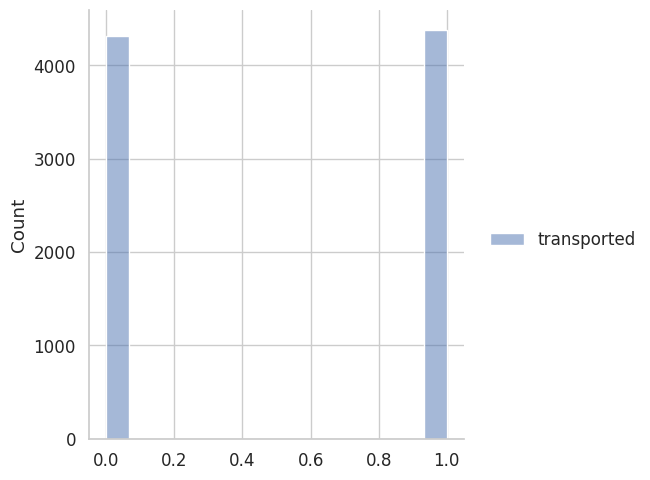

In [25]:
sns.displot(y)

### Histrograms per variable to check distribution and outliers

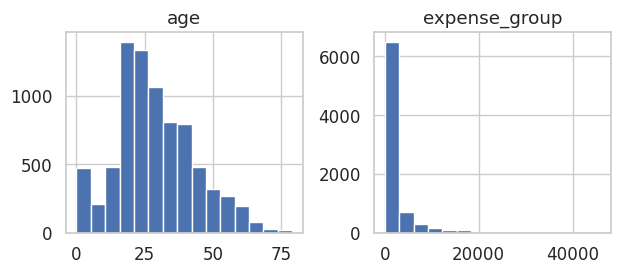

In [26]:
#numerical
df_clean[cols_float].hist(bins=15, figsize=(15, 6), layout=(2, 4));

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


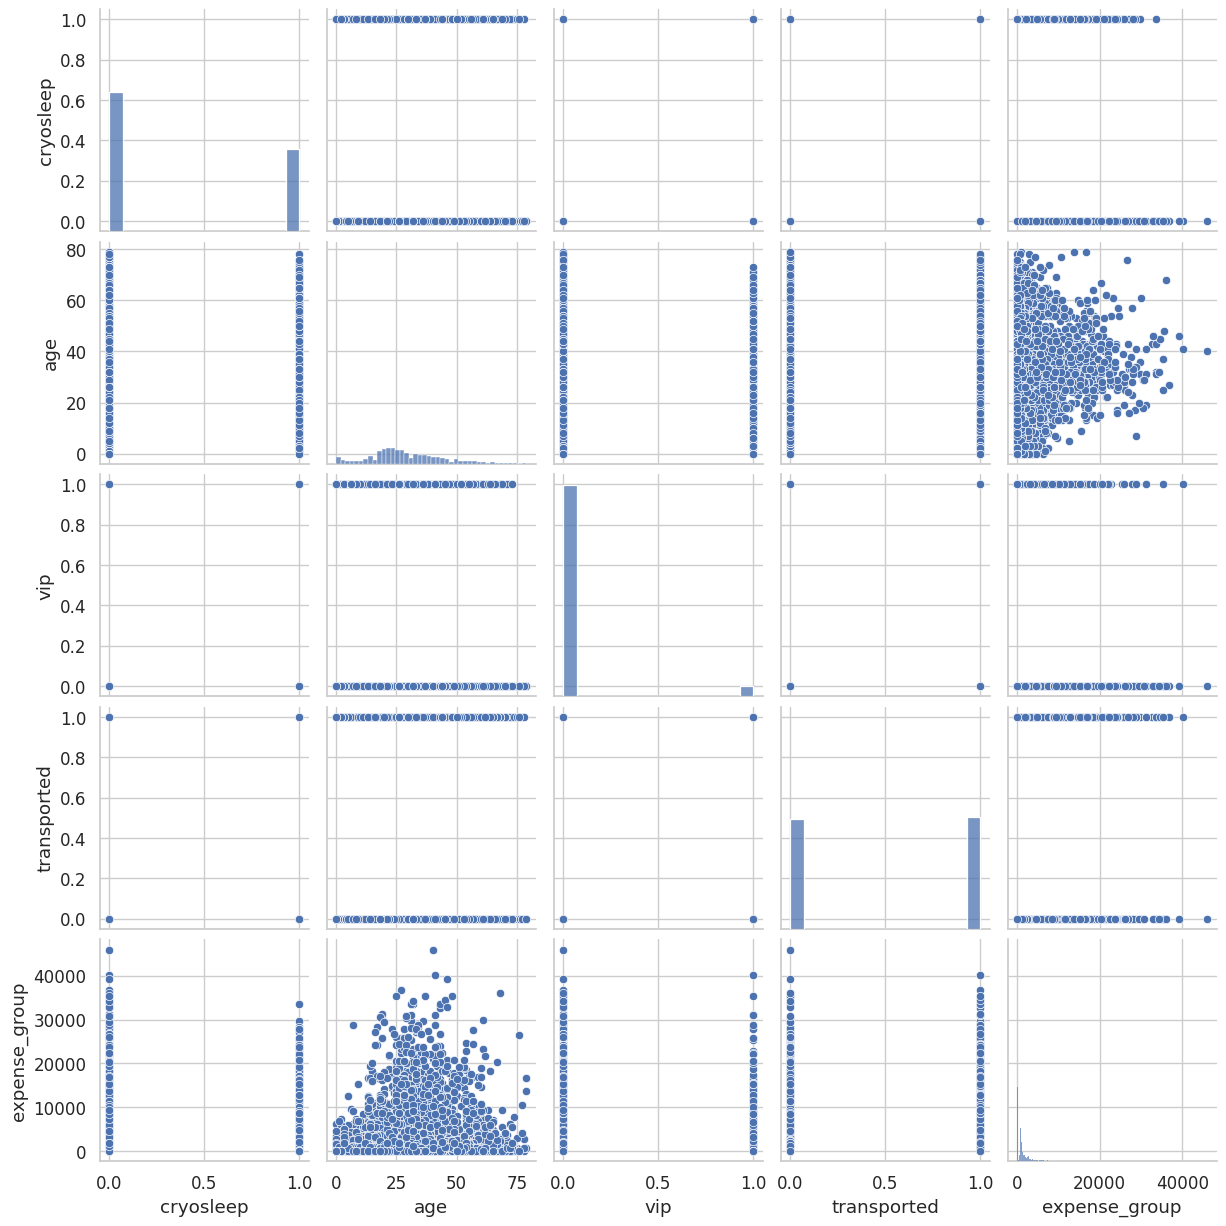

In [27]:
#Categorical
sns.pairplot(df_clean)


# Split data



```
train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

```
arrays — → An input array/series : x,y

test_size — → The value should be between 0 to 1.0 which can be used to represent the proportion of data we want to include in testing data. For example- ideally we consider 30% data under test_size , we can mention test_size = 0.3.

train_size — → By default it is None as it adjusts according to test_size. Value is between 0 and 1.0

random_state — → Controls the shuffling applied to the data before applying the split.

shuffle — → By default it is True , this is used to specify if we want to shuffle the data before splitting. If shuffle is False , then stratify must be None.

stratify — → By default it is None , stratify means array like.

In [ ]:
from sklearn.model_selection import train_test_split

